# Allison Fellhauer

## Research question/interests
I am interested in examining mental health outcomes as it relates to age. Specifically, I would like to see if there are age-specific clusters for those who enjoy specific genres of music and those with differing relationships with music (e.g. composer, instrumentalist, listener) and how that relates to their mental health scores.e.

### Required packages:

In [1]:
# pip install pandas

In [2]:
# pip install altair

In [3]:
import numpy as np
import pandas as pd
import altair as alt
import os
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [4]:
np.random.seed(42)

### Reading Data

In [5]:
DATA_PATH = "../../data/raw/mxmh_survey_results.csv"
music = pd.read_csv(DATA_PATH, parse_dates=["Timestamp"])

## Attribute Investigation

In [6]:
music.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


The first step of EDA is to examine the data itself and see what dataypes we are dealing with (Quantitative, Categorical, Temporal, or Ordered)

In [7]:
music.shape

(736, 33)

In [8]:
music_info = pd.DataFrame({
    "Column": music.columns,
    "Non-Null Count": music.count().values,
    "Dtype": music.dtypes.values
})

music_info.sort_values("Non-Null Count", ascending=True)

,Column,Non-Null Count,Dtype
10,BPM,629,float64
31,Music effects,728,object
9,Foreign languages,732,object
5,Instrumentalist,732,object
4,While working,733,object
6,Composer,735,object
1,Age,735,float64
2,Primary streaming service,735,object
7,Fav genre,736,object
3,Hours per day,736,float64


Now, we can separate the columns according to their data type.

In [9]:
categorical = [
    "Primary streaming service",
    "While working",
    "Instrumentalist",
    "Composer",
    "Fav genre",
    "Exploratory",
    "Foreign languages",
    'Frequency [Classical]',
    'Frequency [Country]', 
    'Frequency [EDM]', 
    'Frequency [Folk]',
    'Frequency [Gospel]', 
    'Frequency [Hip hop]', 
    'Frequency [Jazz]',
    'Frequency [K pop]', 
    'Frequency [Latin]', 
    'Frequency [Lofi]',
    'Frequency [Metal]', 
    'Frequency [Pop]', 
    'Frequency [R&B]',
    'Frequency [Rap]', 
    'Frequency [Rock]', 
    'Frequency [Video game music]',
    'Music effects'
]

numerical = [
    "Age", 
    "Hours per day",
    "BPM",
    "Anxiety",
    "Depression", 
    "Insomnia",
    "OCD"
] 

temporal = [
    "Timestamp"
]

target = "Music effects"

dropped = ["Permissions"]

print(len(categorical) + len(numerical) + len(dropped) + len(temporal)) #Ensure no columns were forgotten!


33


Next, let's see the cardinality of the categorical variables.

In [10]:
unique_counts_music = pd.DataFrame({
    "Column": categorical,
    "Unique Count": [music[col].nunique() for col in categorical],
    "Unique Values": [music[col].unique() for col in categorical]
})

unique_counts_music = unique_counts_music.sort_values("Unique Count", ascending=False)
unique_counts_music

,Column,Unique Count,Unique Values
4,Fav genre,16,"[Latin, Rock, Video game music, Jazz, R&B, K p..."
0,Primary streaming service,6,"[Spotify, Pandora, YouTube Music, I do not use..."
7,Frequency [Classical],4,"[Rarely, Sometimes, Never, Very frequently]"
12,Frequency [Hip hop],4,"[Sometimes, Rarely, Never, Very frequently]"
11,Frequency [Gospel],4,"[Never, Sometimes, Rarely, Very frequently]"
10,Frequency [Folk],4,"[Never, Rarely, Sometimes, Very frequently]"
9,Frequency [EDM],4,"[Rarely, Never, Very frequently, Sometimes]"
8,Frequency [Country],4,"[Never, Sometimes, Very frequently, Rarely]"
16,Frequency [Lofi],4,"[Rarely, Sometimes, Very frequently, Never]"
17,Frequency [Metal],4,"[Never, Sometimes, Rarely, Very frequently]"


### Make _Frequency [genre]_ columns into ordered column

From the unique values, we can see that the frequency of each genre are on a consistent and ordered scale. We can convert them into the pandas categorical data type and assign them an order. 

In [11]:
order = ["Never", "Rarely", "Sometimes", "Very frequently"]

for col in music.columns:
    if "Frequency" in col:
        music[col] = pd.Categorical(music[col], categories=order, ordered=True)

music_info_updated = pd.DataFrame({
    "Column": music.columns,
    "Non-Null Count": music.count().values,
    "Dtype": music.dtypes.values
})

music_info_updated.sort_values("Non-Null Count", ascending=True)

,Column,Non-Null Count,Dtype
10,BPM,629,float64
31,Music effects,728,object
9,Foreign languages,732,object
5,Instrumentalist,732,object
4,While working,733,object
6,Composer,735,object
1,Age,735,float64
2,Primary streaming service,735,object
7,Fav genre,736,object
3,Hours per day,736,float64


## Handling NA's 

It's important to understand how many missing values each column has so we can stratgize ways to handle them.

In [12]:
na_counts_music = pd.DataFrame({
    "Column": music.columns,
    "Missing Values": [music[col].isna().sum() for col in music.columns]
})

na_counts_music["proportion"] = na_counts_music["Missing Values"]/len(music) * 100
na_counts_music = na_counts_music.round(2)
na_counts_music = na_counts_music.sort_values("proportion", ascending=False)
columns_with_nas = na_counts_music[na_counts_music["proportion"] > 0]
columns_with_nas

,Column,Missing Values,proportion
10,BPM,107,14.54
31,Music effects,8,1.09
9,Foreign languages,4,0.54
5,Instrumentalist,4,0.54
4,While working,3,0.41
2,Primary streaming service,1,0.14
6,Composer,1,0.14
1,Age,1,0.14


BPM has a large amount of NA's. Let's investigate BPM further.

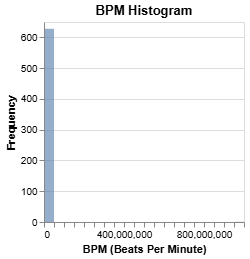

In [13]:
hist_bpm_unprocessed= alt.Chart(music).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="BPM Histogram",
    height = 200,
    width = 200
)
hist_bpm_unprocessed

Something is causing quite the skew! We need to handle this before we can strategize handling NA's.

### Find the outliers

In [14]:
music.describe()

,Timestamp,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,736,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,2022-09-03 19:54:51.849184768,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
min,2022-08-27 19:29:02,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2022-08-28 19:58:27.249999872,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,2022-08-29 13:41:45.500000,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,2022-09-03 17:26:35.500000,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,2022-11-09 01:55:20,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000
std,NaN,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017


BPM has some _massive_ outliers!

In [15]:
sorted_bpm = music["BPM"].dropna().sort_values(ascending=True)

print("Lowest 10 BPM values:")
print(sorted_bpm.head(10))

print("\nHighest 10 BPM values:")
print(sorted_bpm.tail(10))

Lowest 10 BPM values:
339     0.0
639     0.0
524     0.0
429     4.0
567     8.0
372    20.0
421    40.0
214    52.0
427    55.0
58     55.0
Name: BPM, dtype: float64

Highest 10 BPM values:
296          200.0
498          204.0
353          208.0
564          210.0
711          210.0
662          218.0
610          220.0
248          220.0
644          624.0
568    999999999.0
Name: BPM, dtype: float64


The top two values are outliers, so are the bottom 5. Let's narrow the range and try displaying the data again.

In [16]:
maxOutlierBPM = min(music["BPM"].nlargest(2))
minOutlierBPM = max(music["BPM"].nsmallest(5))

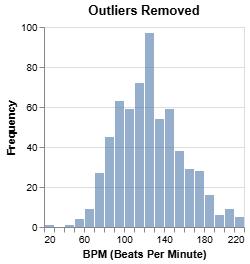

In [17]:
hist_bpm_outliers_removed= alt.Chart(
    music[(music["BPM"] < maxOutlierBPM) & (music["BPM"] > minOutlierBPM)]
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Outliers Removed",
    height = 200,
    width = 200
)
hist_bpm_outliers_removed

In [18]:
droppedMax = music["BPM"].nlargest(2).index
droppedMin = music["BPM"].nsmallest(5).index
droppedOutliers = droppedMax.union(droppedMin)
music_cleaned = music.drop(index=droppedOutliers)
print(min(music_cleaned["BPM"]))
print(max(music_cleaned["BPM"]))

20.0
220.0


Next, we will handle the missing values. Let's visualize the data using different methods.

In [19]:
music_imputed_mean = music_cleaned.copy()
music_imputed_mean["BPM"] = music_imputed_mean["BPM"].fillna(music_cleaned["BPM"].mean())
music_imputed_median = music_cleaned.copy()
music_imputed_median["BPM"] = music_imputed_median["BPM"].fillna(music_cleaned["BPM"].median())
music_dropped = music_cleaned.dropna(subset=["BPM"])

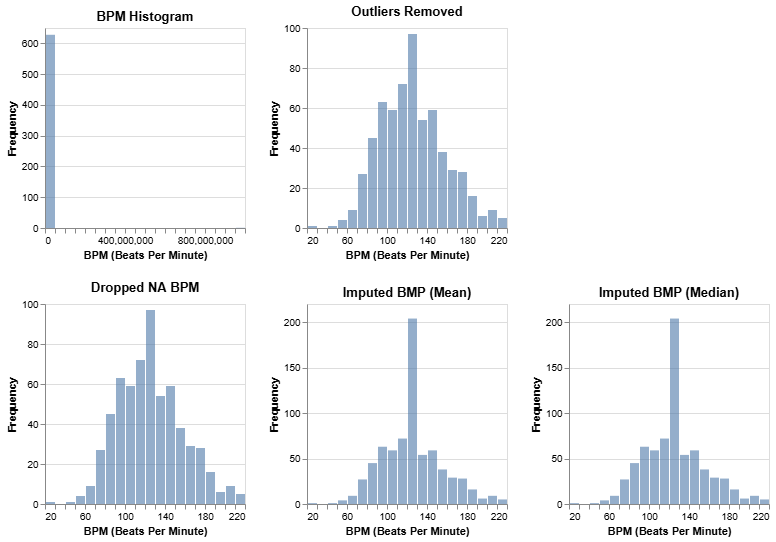

In [20]:

hist_bpm_imputed_mean = alt.Chart(
    music_imputed_mean
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Imputed BMP (Mean)",
    height = 200,
    width = 200
)
hist_bpm_imputed_median = alt.Chart(
    music_imputed_median
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Imputed BMP (Median)",
    height = 200,
    width = 200
)
hist_bpm_dropped = alt.Chart(
    music_dropped
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Dropped NA BPM", 
    height = 200,
    width = 200
)
(hist_bpm_unprocessed | hist_bpm_outliers_removed) & (hist_bpm_dropped | hist_bpm_imputed_mean | hist_bpm_imputed_median)

Imputing using mean or median is causing a large peak at the mean/median. Let's try imputing using trends in the data.

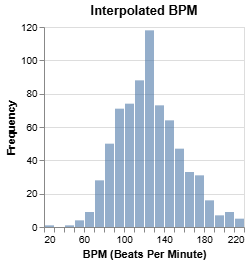

In [21]:
music_interpolated = music_cleaned.copy()
music_interpolated["BPM"] = music_cleaned["BPM"].interpolate(method="linear")

hist_bpm_interpolated = alt.Chart(
    music_interpolated
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Interpolated BPM", 
    height = 200,
    width = 200
)
hist_bpm_interpolated

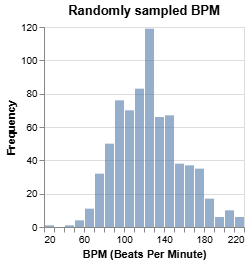

In [22]:
bpm_values = music_cleaned["BPM"].dropna()
music_filled_random_sampling = music_cleaned.copy()
music_filled_random_sampling["BPM"] = music_cleaned["BPM"].apply(lambda x: np.random.choice(bpm_values) if pd.isna(x) else x)

hist_music_sampled = alt.Chart(
    music_filled_random_sampling
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Randomly sampled BPM", 
    height = 200,
    width = 200
)
hist_music_sampled

For missing values, we should either impute using randomly sampled BPM or interpolated BPM. This will best preserve the original shape without causing the massive peak at the centre. Let's go with interpolation.

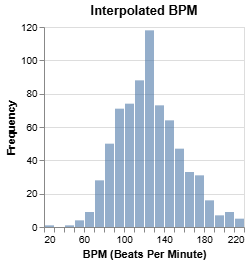

In [23]:
music_cleaned_imputed = music_cleaned.copy()  # Make a copy to keep original data
music_cleaned_imputed["BPM"] = music_cleaned_imputed["BPM"].interpolate(method="linear")


hist_cleaned_imputed = alt.Chart(
    music_cleaned_imputed
).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=30), title="BPM (Beats Per Minute)"),
    alt.Y("count()", title="Frequency"),
).properties(
    title="Interpolated BPM", 
    height = 200,
    width = 200
)
hist_cleaned_imputed

### Other Columns with NA's

In [24]:
columns_with_nas

,Column,Missing Values,proportion
10,BPM,107,14.54
31,Music effects,8,1.09
9,Foreign languages,4,0.54
5,Instrumentalist,4,0.54
4,While working,3,0.41
2,Primary streaming service,1,0.14
6,Composer,1,0.14
1,Age,1,0.14


Since the number of NA's is fairly small, we can go ahead and drop these rows.

In [25]:
music_cleaned_imputed.dropna(inplace=True)

In [26]:
music_cleaned_imputed_count = music_cleaned_imputed.isna().sum()
music_cleaned_imputed_count

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

## Choosing columns

### Numerical Univariate Analysis

Let's investigate the columns by looking at histograms for each numerical column:

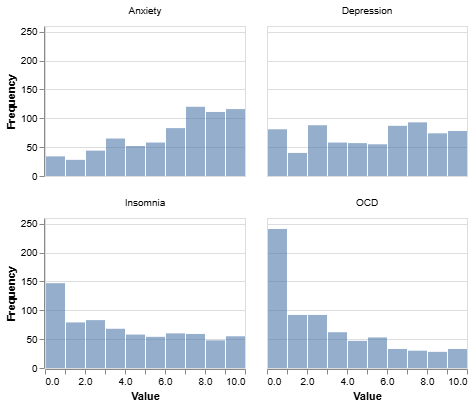

In [27]:
music_mental_illnesses = music_cleaned_imputed.drop(columns=["Age", "Hours per day", "BPM"])
music_mental_illnesses = music_mental_illnesses.drop(columns=categorical)
music_mental_illnesses = music_mental_illnesses.drop(columns=dropped)
music_mental_illnesses = music_mental_illnesses.drop(columns=temporal)

music_melted = music_mental_illnesses.melt(value_vars=music_mental_illnesses.columns, var_name="Column", value_name="Value")

mental_illness_distribution_hist = alt.Chart(music_melted).mark_bar(opacity=0.6).encode(
    alt.X("Value:Q", bin=alt.Bin(maxbins=10), title="Value"),
    alt.Y('count()', title="Frequency"),
    alt.Facet("Column:N", title=None, columns=2) 
).properties(
    width=200,
    height=150
)

mental_illness_distribution_hist

We can see that the mental health reporting has values varying between 0 and 10, which matches with the 10 point scale used by the survey. The values themselves are quite evenly spread for anxiety, depression, and insomnia - which suggests the survey had a variation of respondants of differing mental health statuses. OCD is skewed towards zero, suggesting a smaller sample of inviduals with OCD compared to the other mental health conditions.

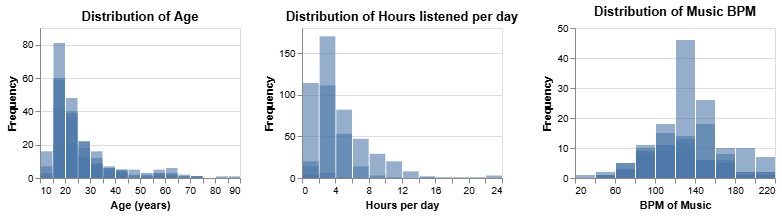

In [28]:
hist_age = alt.Chart(music_cleaned_imputed).mark_bar(opacity=0.6).encode(
    alt.X("Age:Q", bin=alt.Bin(maxbins=20), title="Age (years)"),
    alt.Y('count()', title="Frequency"),
    tooltip = ["Age", "count()"]
).properties(
    width=200,
    height=150,
    title="Distribution of Age"
)
hist_hours = alt.Chart(music_cleaned_imputed).mark_bar(opacity=0.6).encode(
    alt.X("Hours per day:Q", bin=alt.Bin(maxbins=15), title="Hours per day"),
    alt.Y('count()', title="Frequency"),
    tooltip = ["Hours per day", "count()"]
).properties(
    width=200,
    height=150,
    title="Distribution of Hours listened per day"
)
hist_bpm = alt.Chart(music_cleaned_imputed).mark_bar(opacity=0.6).encode(
    alt.X("BPM:Q", bin=alt.Bin(maxbins=15), title="BPM of Music"),
    alt.Y('count()', title="Frequency"),
    tooltip = ["BPM", "count()"]
).properties(
    width=200,
    height=150,
    title="Distribution of Music BPM"
)

hist_age | hist_hours | hist_bpm


Respondant age skews younger, which is unsurprising considering that the survey was published using online forums and social media sites. Distribution of hours listened per day is skewed towards 0-8 hours, with a three people listening 24 hours a day. BPM, now that it has been cleaned and sliced, displays a tendency for individuals to listen to music around 120 bpm. 

### Numerical Bivariate Analysis

Let's explore if any of the numerical features have interesting interactions. Since there are 7 numerical variables, it should not be too overwhelming to view them all simultaneously.

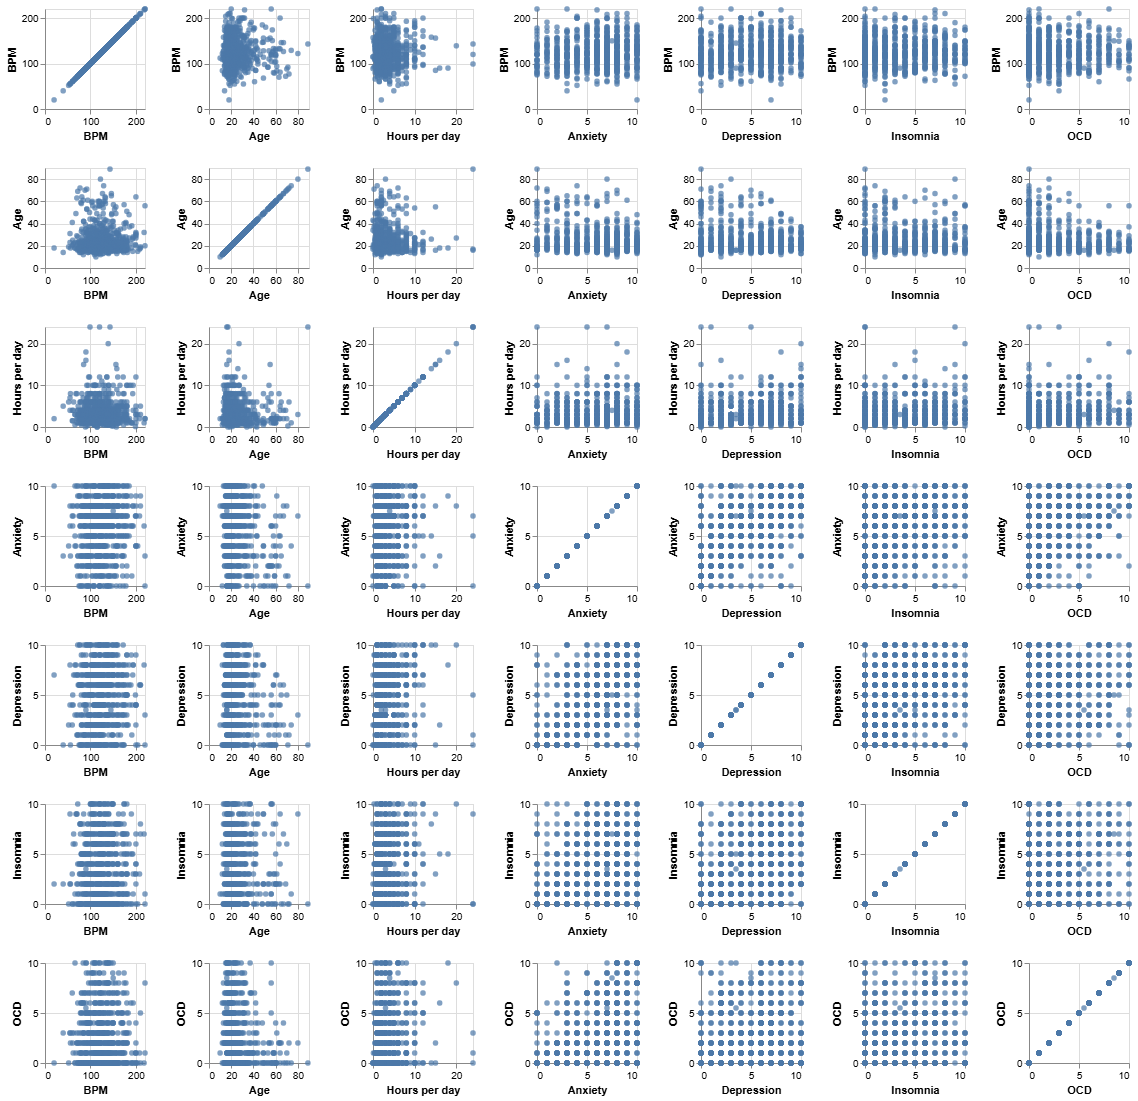

In [29]:
scatter_matrix = alt.Chart(music_cleaned_imputed).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    width=100,
    height=100
).repeat(
    row=["BPM", "Age", "Hours per day", "Anxiety", "Depression", "Insomnia", "OCD"],
    column=["BPM", "Age", "Hours per day", "Anxiety", "Depression", "Insomnia", "OCD"]
)
scatter_matrix

There are no obvious trends that popout, but we can see that for the mental health scores, the values are discrete. Let's examine the cardinality.

In [30]:
for cat in ["Anxiety", "Depression", "Insomnia", "OCD"]:
    unique = [float(x) for x in sorted(music_cleaned_imputed[cat].unique())]
    print(cat + " (" + str(len(unique)) + "): " + str(unique))

Anxiety (12): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 7.5, 8.0, 9.0, 10.0]
Depression (12): [0.0, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Insomnia (12): [0.0, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
OCD (13): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.5, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0]


All values range from 0 - 10. In addition to using the raw values themselves, it could be helpful to group the variables into levels ranging from low to high. Let's add another column and split the levels.

In [31]:
music_cleaned_imputed['Anxiety_Level'] = pd.cut(
    music_cleaned_imputed['Anxiety'], 
    bins=[0, 3, 6, 10], 
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

music_cleaned_imputed['Depression_Level'] = pd.cut(
    music_cleaned_imputed['Depression'], 
    bins=[0, 3, 6, 10],  
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

music_cleaned_imputed['Insomnia_Level'] = pd.cut(
    music_cleaned_imputed['Insomnia'], 
    bins=[0, 3, 6, 10],  
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

music_cleaned_imputed['OCD_Level'] = pd.cut(
    music_cleaned_imputed['OCD'], 
    bins=[0, 3, 6, 10],  
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# music_cleaned_imputed.isna().sum()
# Without include_lowest = true, the 3.5, 6.5 etc. values were excluded (set to null)

for cat in ["Anxiety_Level", "Depression_Level", "Insomnia_Level", "OCD_Level"]:
    music_cleaned_imputed[cat] = pd.Categorical(
        music_cleaned_imputed[cat], categories=["Low", "Medium", "High"], ordered=True
    )

In [32]:
music_cleaned_imputed.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Anxiety_Level,Depression_Level,Insomnia_Level,OCD_Level
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,7.0,7.0,10.0,2.0,No effect,I understand.,High,High,High,Low
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,9.0,7.0,3.0,3.0,Improve,I understand.,High,High,Low,Low
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,7.0,2.0,5.0,9.0,Improve,I understand.,High,Low,Medium,High
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,8.0,8.0,7.0,7.0,Improve,I understand.,High,High,High,High
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,4.0,8.0,6.0,0.0,Improve,I understand.,Medium,High,Medium,Low


Let's do the same bivariate scatter matrix, but try labelling the scatter points as different mental health conditions.

---------------------------------------------------------------------------------------------------------------------------


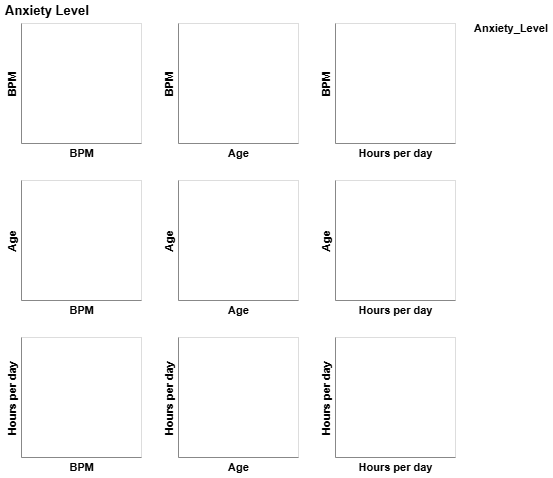

---------------------------------------------------------------------------------------------------------------------------


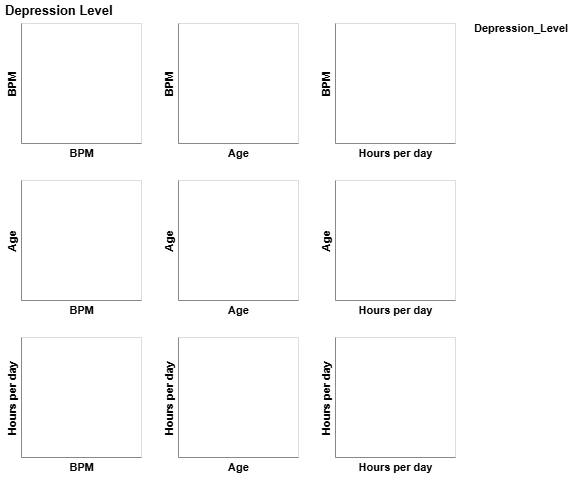

---------------------------------------------------------------------------------------------------------------------------


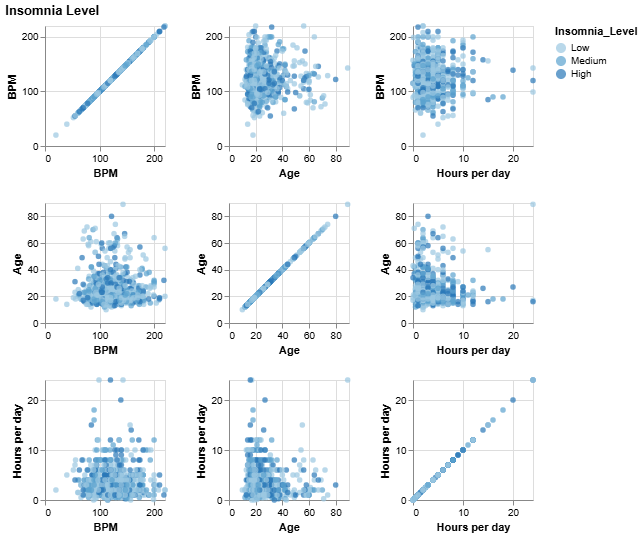

---------------------------------------------------------------------------------------------------------------------------


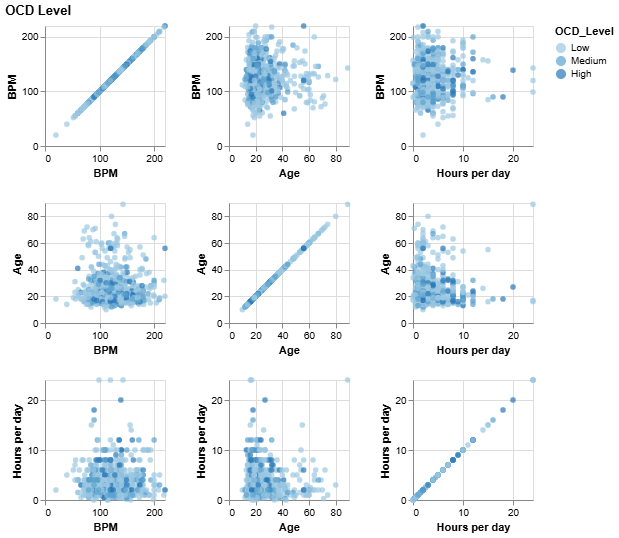

In [33]:

num_cols = ["BPM", "Age", "Hours per day"]

for cat in ["Anxiety_Level", "Depression_Level", "Insomnia_Level", "OCD_Level"]:
    print("---------------------------------------------------------------------------------------------------------------------------")
    display(alt.Chart(music_cleaned_imputed).mark_circle().encode(
        alt.X(alt.repeat("column"), type='quantitative'),
        alt.Y(alt.repeat("row"), type='quantitative'),
        alt.Color(cat, type="ordinal")
    ).properties(
        width=120,
        height=120
    ).repeat(
        row=num_cols,
        column=num_cols
    ).properties(
        title = cat.replace("_", " "),
    )
           )

No obvious trends are visualized given the scatter matrix. Perhaps looking at just a single dimension (age) would reveal more interesting patterns.

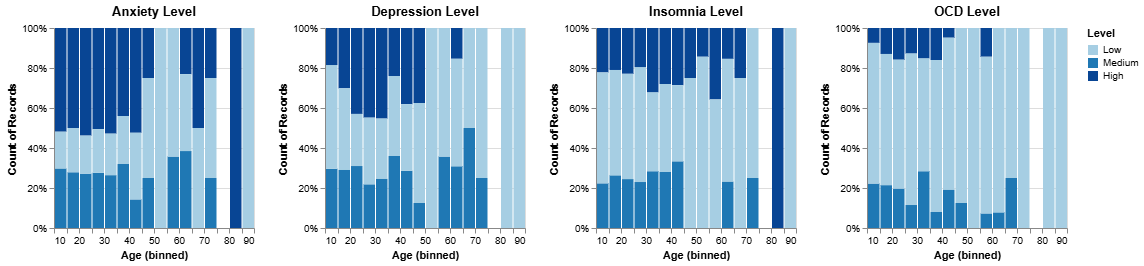

In [34]:
charts = []
custom_colors = alt.Scale(
    domain=["Low", "Medium", "High"],  
    range=["#a6cee3", "#1f78b4", "#084594"]
)
for cat in ["Anxiety_Level", "Depression_Level", "Insomnia_Level", "OCD_Level"]:
    charts.append(alt.Chart(music_cleaned_imputed).mark_bar().encode(
        alt.X("Age:Q", bin=alt.Bin(maxbins=30)),
        alt.Y("count():Q", stack="normalize"),
        alt.Color(cat, type="ordinal", title="Level", sort =["Low", "Medium", "High"], scale=custom_colors),
        alt.Tooltip([cat, "count()"])
    ).properties(
        title = cat.replace("_", " "),
        width = 200,
        height = 200,
    )
                      )
final_chart = alt.hconcat(*charts)
final_chart

We can see some interesting patterns now:
- For younger people, there is a high proportion reporting higher anxiety compared to older. It should be noted that the number of respondants decrease drastically with age
- Depression level is high for younger individuals, but less so than anxiety.
- Insomnia is predominantly reported as low and OCD has even more low reports than 

For my final look, I want to see how the raw mental health scores vary across the age and compare all three in a single plot. Let's use a heatmap to see if I can pick out any patterns.

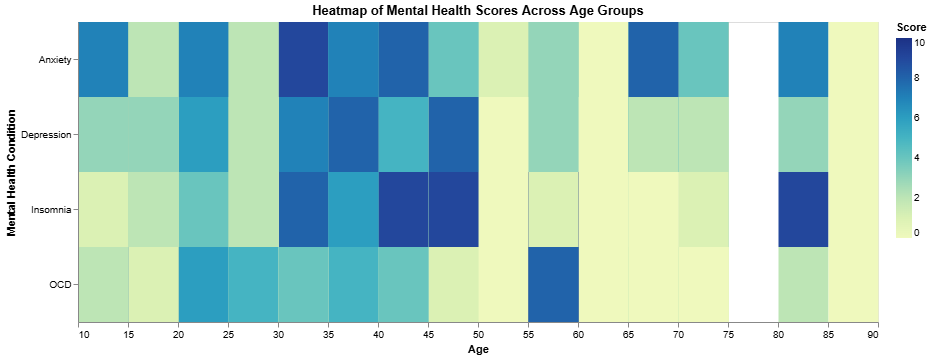

In [35]:
data_melted = music_cleaned_imputed.melt(id_vars=['Age'], 
                                         value_vars=['Anxiety', 'Depression', 'Insomnia', 'OCD'], 
                                         var_name='Mental Health Condition', 
                                         value_name='Score')

heatmap = alt.Chart(data_melted).mark_rect().encode(
    alt.X('Age:Q', title='Age', bin=alt.Bin(step=5)),  
    alt.Y('Mental Health Condition:N', title='Mental Health Condition'),
    color=alt.Color('Score:Q', title='Score'),
    tooltip=['Age', 'Mental Health Condition', 'Score']
).properties(
    title="Heatmap of Mental Health Scores Across Age Groups",
    height=300,
    width=800
)

heatmap


This heatmaps lets us see a distinct darker spot between 30-50 for higher reported anxiety, depression, and insomnia compared to older ages. We can see that this age-group experiences more intense mental health ratings.

### Summary: Numerical Bivariate and Univariate Analysis

This analysis has shown the distribution of the numerical variables. We have seen that:
1. The mental health condition distribution is fiarly uniform, with the exception of OCD having a peak at 0
2. Age has a peak between 15-30, suggesting that most respondants are younger
3. Hours per day has a peak between 0-8 hours per day
4. BPM of music has a peak value around 120
5. There are no obvious correlations between numerical columns
6. There are no obvious clusters when plotting numerical columns for different level of the different mental health conditions
7. There are some interesting patterns with mental health condition level and age, with younger people having high reports of depression and anxiety compared to low and medium.
8. Using just the raw scores, we can see a cluster of higher reported anxiety, depression, and insomnia for respondants ages 30-50. 

For the numerical columns, I am most interested in the dimension of age as it relates to mental illness. To incorporate music, we need to investigate the categorical varibles first.

## Further Analysis: Categorical Variables

### Favourite Genres

To start, let's see which are the most popular genres.

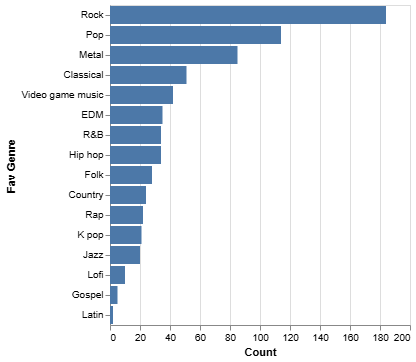

In [36]:
alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Fav genre:N", title="Fav Genre", sort = "-x"),
    alt.X("count(Fav genre)", title="Count"), 
    alt.Tooltip(["Fav genre", "count(Fav genre):Q"])
)

It seems as though Rock, Pop, Metal and Classical are the top genres. Although it is interesting to examine all genres, it may be challenging to compare Latin which only got 2 votes vs. rock which got 184. Perhaps it would be more meaningful to examine the within-genre variation for just the top four.

I also want to examine the instrumentalist and composer columns to see the break down of those who play/make music vs. those who do not.

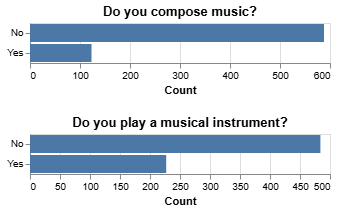

In [37]:
composer = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Composer:N", title=None, sort = "-x"),
    alt.X("count(Composer)", title="Count"), 
    alt.Tooltip(["Composer", "count(Composer):Q"])
).properties(
    title = "Do you compose music?"
)

# Instrumentalist
instrumentalist = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Instrumentalist:N", title=None, sort = "-x"),
    alt.X("count(Instrumentalist)", title="Count"), 
    alt.Tooltip(["Instrumentalist", "count(Instrumentalist):Q"])
).properties(
    title = "Do you play a musical instrument?"
)

composer & instrumentalist

Based on this, we can see that most respondants do not compose music compared to those who do, and most respondants do not play a musical instrument compared to those that do.

Let's make a new chart to show those who: play an instrument, those who compose, those who do both, and those that do neither.

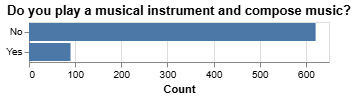

In [38]:
music_cleaned_imputed['Player_Composer'] = (
    (music_cleaned_imputed["Composer"] == "Yes") & (music_cleaned_imputed["Instrumentalist"] == "Yes")
).map({True: "Yes", False: "No"})

player_and_composer = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.Y("Player_Composer:N", title=None, sort = "-x"),
    alt.X("count(Player_Composer)", title="Count"), 
    alt.Tooltip(["Player_Composer", "count(Player_Composer):Q"])
).properties(
    title = "Do you play a musical instrument and compose music?"
)
player_and_composer

## Specific EDA: Age

Next, I want to see how the favourite genres vary by age.

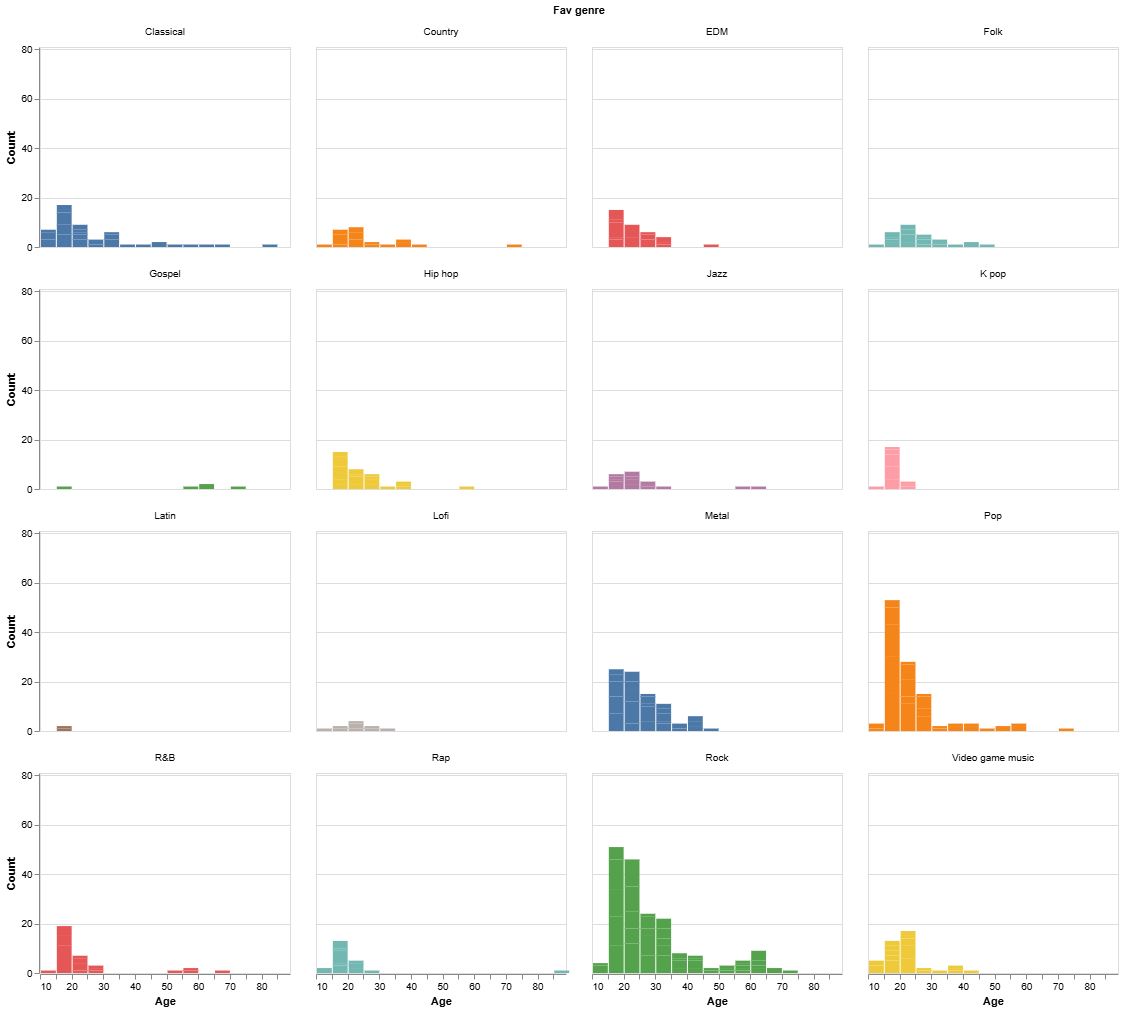

In [39]:
min_age = int(music_cleaned_imputed["Age"].min())
max_age = int(music_cleaned_imputed["Age"].max())
max_y = music_cleaned_imputed.groupby("Age")["Fav genre"].count().max()


age_genre_hist = alt.Chart(music_cleaned_imputed).mark_bar().encode(
    alt.X("Age:Q", bin=alt.Bin(step=5), title="Age",
          axis=alt.Axis(values=list(range(min_age, max_age+5, 5))),
          scale=alt.Scale(domain=[min_age, max_age])),
    alt.Y("count()", title="Count",
          scale=alt.Scale(domain=[0, max_y])),
    alt.Color("Fav genre:N", legend=None),
    tooltip=["Age", "Fav genre", "count()"]
).properties(
    width=250,
    height=200
).facet(
    "Fav genre",
    columns=4
)

age_genre_hist


Some interesting spreads emerged - Video game, Lofi and Kpop are clustered with young people, whereas gospel is predominately older.

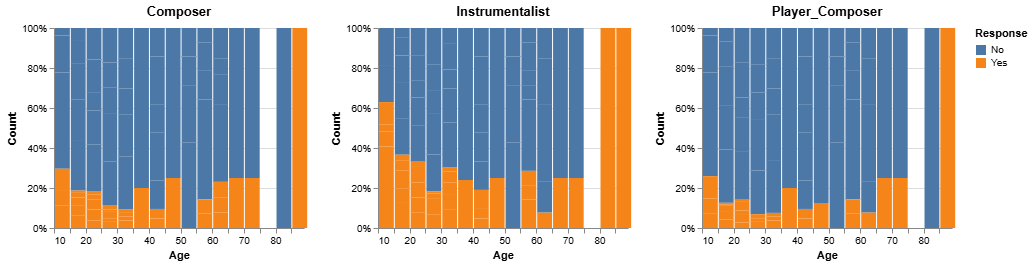

In [40]:
min_age = int(music_cleaned_imputed["Age"].min())
max_age = int(music_cleaned_imputed["Age"].max())
cats = ["Composer", "Instrumentalist", "Player_Composer"]
charts = []
for cat in cats:
    charts.append(alt.Chart(music_cleaned_imputed).mark_bar().encode(
         alt.X("Age:Q", bin=alt.Bin(step=5), title="Age",
              axis=alt.Axis(values=list(range(min_age, max_age+5, 5))),
              scale=alt.Scale(domain=[min_age, max_age])),
        alt.Y("count()", title="Count", stack="normalize"),
        alt.Color(cat, type="nominal", title="Response"),
        tooltip=["Age", cat, "count()"]
    ).properties(
        width=250,
        height=200,
        title=cat
    )
                 )
final_chart = alt.hconcat(*charts)
final_chart

We can see that the 10-15 age group has the most instrumentalists compared to other ages (aside from 80-85 and 85-90, which each have a single individual). Otherwise, it is fairly uniform.

## Final steps

So far, I have examined the data and gone into depth investigating the numerical columns and the favourite genre column. Now, I can devise my research question

### Research questions:

**1. Does Age Influence the Relationship Between Music Genre Preferences and Mental Health Scores?**
- how music preferences correlate with mental health scores for different age groups
- Group similar age-genre-mental health patterns (e.g., young people preferring rock vs. older people preferring jazz)

FINER Breakdown:
- **Feasible**: The dataset contains age, genre preferences, and self-reported mental health scores (anxiety, depression, insomnia, OCD).
- **Interesting**: Understanding if music therapy should be age-specific would be valuable.
- **Novel**: Beyond trivial by asking whether age changes the strength of the relationship between music preferences and mental health scores.
- **Ethical**: The dataset is publicly available and anonymized.
- **Relevant**: This can inform music therapy applications, tailoring music interventions based on age.

**2: How Does Age Influence the Relationship Between Music Engagement and Mental Health Outcomes?**
- Examine how different forms of music engagement (e.g., instrumentalist, composer) correlate with mental health outcomes across various age groups.
- Do those who engage with music in more dimensions (e.g. composer or musician) form distinct groups?

FINER Breakdown:

- **Feasible**: The dataset includes variables on music engagement activities and self-reported mental health scores (anxiety, depression, insomnia, OCD), along with participants' ages.
- **Interesting**: How different roles in music engagement impact mental health differently across age groups can provide insights into age-appropriate therapeutic interventions.
- **Novel**: This question goes further by investigating whether music engagement affects mental health, and if it changes with age.
- **Ethical**: The dataset is publicly available and anonymized.
- **Relevant**: Findings can inform the development of targeted music-based interventions to improve mental health outcomes in specific age demographics.